In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 8) # set default figure size, 10in by 8in

# Chapter 2: The Mathematical Building Blocks of Neural Networks

Supporting materials for:

Chollet (2021). *Deep Learning with Python*. 2nd ed. Manning Publications Co.
[Amazon](https://www.amazon.com/Learning-Python-Second-Fran%C3%A7ois-Chollet/dp/1617296864/ref=sr_1_1?crid=32NFM2SBCJVQQ)

Understanding deep learning requires familiarity with many simple mathematical
concepts: tensors, tensor operations, differentiation, gradient descent, and so on.
Out goal in this notebook/chapter is to build up your intiution about these mathematical
concepts without getting over technical.

One note about the term tensors.  **Tensor** is a mathematical term that simply can be used to refer
to a matrix of values, no matter how many dimensions.  Thus a 1-dimensional vector or a 2-dimensional
matrix are both *Tensors*, as well as 3-dimensional or higher matrices.  Vectorized programming
could also be referred to as tensor programming, but the term vectorized programming was coined
before the term tensor was in common use.  Another difference is that the term Tensor programming
and Tensor libraries have come to mean the types of vectorized or tensor operations we usually think of, but
it also includes libraries that can automatically differentiate such tensors with respect to
a loss function.  We will get to these concepts in a bit more detail below.



# 2.1 A First Look at a Neural Network

You will need to have Keras and its dependencies installed before you can run the next example cell.  If you
are using the Anaconda Python distribution as recommended, from a command line you can simply do

```
$ conda install keras
```

to install the `keras` library, `tensorflow` and all other needed dependencies.  You can also use the Anaconda
package management system of Anaconda to install the Keras library and required dependencies as well.

The following command loads the MNIST dataset.  This dataset has been referred to as the *fruit fly* model
of vision machine learning, and is often used as a benchmark for doing neural network and deep learning
examples.

The dataset is still relatively big, despite being used for learning, so it actually downloads the
data for you.  The result of loading the data is a set of `NumPy` n-dimensional arrays (Tensors)
holding the images and the labeles of the data.

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images` and `train_labels` hold the *training set*, the data the model will learn from.  The model
should be tested on the other *test set* data, `test_images` and `test_labels`.

The images and labels are encoded as Numpy arrays.  Lets look at them.

In [5]:
print ('Training images information:')
print( type(train_images) )
print( train_images.shape )
print( train_images.dtype )

print('')
print('Training labels information:')
print( type(train_labels) )
print( train_labels.shape )
print( train_labels.dtype )
print( train_labels )

Training images information:
<class 'numpy.ndarray'>
(60000, 28, 28)
uint8

Training labels information:
<class 'numpy.ndarray'>
(60000,)
uint8
[5 0 4 ... 5 6 8]


Notice that this is a Numpy `ndarray` object, which is used to hold arbitrary n-dimensional arrays (e.g. Tensors).
There are 60000 images in the training data.  Each image is of shape $28 \times 28$, and is an 8 bit integer 
giving a grey scale value from 0 to 255 for each of the pixels of the image.

The labels are simple integer values, from 0-9 giving the label or class for each of the images.

The test data is similar, but it consists of 10000 different images that can be used for testing.

Our textbook doesn't show this, but we can visualize the images if we want.  For example, the 0th training
image is labeled as a 5.  We can interpret the values in the $28 x 28$ array as greyscale pixel values
like this:

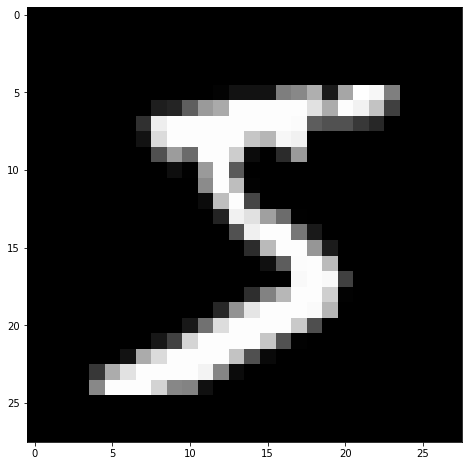

In [6]:
# make a slice of the 28x28 pixel values of training image 0
img = train_images[0,:,:]

# display the imge using matplotlib
plt.imshow(img, cmap='gray');

As you can probably infer from this, the MNIST data set is a set of handwritten digits.  All digits have
been converted to greyscale representations and scaled to be $28 \times 28$ pixels in size.  

Lets build the example network and train it as shown in our textbook.

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

# create a full model with a dense layer and activation layer
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

2022-01-27 09:57:19.305615: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-27 09:57:19.305851: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-27 09:57:19.305966: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


We described a bit some of the things in the previous example in the code comments.  A networks consists of
a sequence of layers.  We added 2 `Dense` layers to the network we are going to train.  A `Dense` layer
is a fully connected layer, all inputs to the layer are fully connected to each output of the layer.

We will talk about the activation functions in more detail later.
Notice that the first layer uses an 'relu' activation
function, while the second layer uses a 'softmax' activation function.
A 20-way *softmax* layer means that this layer will return an array of 10 probability
scores (summing to 1).  Each score will represent the probability that the current
image belongs to one of the 10 output labels.

To make the network ready for training we need to pick 3 more things.

1. A *loss function* - How the network will measure its performance
2. An *optimizer* - The mechanism through wich the network updates itself
3. *Metrics to monitor* during training and testing.

In [8]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Before training we need to do a bit of preprocessing.  For example, the input_shape is actually flat,
it doesn't expect a 2-dimensional input, but a 1-dimensional input of size $28 \times 28 = 784$ inputs.
Also the keras network will expect floating point values as inputs by default.

We can easily perform both of these transformations using Numpy functions

In [9]:
# flatten the 2-d images to 1-d of 784 inputs
train_images = train_images.reshape((60000, 28 * 28))

# transform the greyscale integer values to floats for input
train_images = train_images.astype('float32') / 255.0

# show results
print( train_images.shape )
print( train_images.dtype )

# transform the test images as well in the same way while we are at it
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255.0


(60000, 784)
float32


Preparing the labels.  The following was needed in 1st edition, but was not shown
in second edition of book.  Not sure if keras version is supposed to recognize
categorical labels like this and do the right thing in more recent versions?


In [10]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print( train_labels.shape )

(60000, 10)


And we are now reaty to train the network.  The `fit()` method will train the network, using the
given training data, for the number of iterations specified.  The loss function and optimization
methods that were specified previously are used for the training.

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128);

Epoch 1/5


2022-01-27 09:57:19.526299: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-27 09:57:19.526973: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3000000000 Hz


469/469 [==============================] - 3s 6ms/step - loss: 0.4217 - accuracy: 0.8755
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1093 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0676 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0492 - accuracy: 0.9857
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0371 - accuracy: 0.9887


Notice that the measure of the loss and the accuracy are trained.  Recall that the loss function
is what is actually used to change the weights to improve the model.  You should
see that loss decreases.  Weights in the layers are initialized to random values, as mentioned
in our textbook, so your results can vary a bit.  But you should typically see that we get
over 98% accuracy on the training data after only 5 epochs of training.

But the true test is how well the trained network does on data it has not seen before.  We
can evaluate the performance on the test data like this:

Use the model to make some predictions.

In [12]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([3.46945761e-09, 2.83969209e-10, 7.27271890e-06, 6.00708736e-05,
       1.96343549e-11, 4.98472268e-08, 1.20695351e-13, 9.99930859e-01,
       1.26222375e-08, 1.69029579e-06], dtype=float32)

In [13]:
print( test_labels[0] )

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [14]:
predictions[0].argmax()

7

In [15]:
predictions[0][7]

0.99993086

Evaluate the model on new test data, compute accuracy.

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_loss: ', test_loss)
print('test_acc:  ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9803
test_loss:  0.06561002880334854
test_acc:   0.9803000092506409


Typically the test accuraccy will be a bit lower, but still pretty close to 98%.

# 2.2 Data Representations for Neural Networks

In general, all current machine-learning systems and libraries use tensors as their basic data structure.
As we mentioned a Numpy `ndarray` which holds an arbitrary n-dimensional array, is also known as a *tensor*.

At its core a tensor is a container for data, all numerical and all of the same type.  So it is a container
for numbers.

## 2.2.1 Scalars (0D tensors)

A tensor that contains only 1 number is called a *scalar*.  You can display the number of axes of a Numpy
tensor via the `ndim` attribute.  A scalar tensor has 0 axes (`ndim == 0`).  The number of axes of a
tensor is also called its rank.

In [17]:
x = np.array(12)
print(x)
print(x.ndim)

12
0


## 2.2.2 Vectors (1D tensors)

A tensor with 1 axis is also called a *vector*.  The rank or number of dimensions is different from the
number of entries.  Unfortunately, and confusingly, in mathematics the following matrix can be referred
to as a 4-dimensional vector.  *Dimensionality* can denote eiather the number of entries along a specific
axis, or the number of axes in a tensor, which can be confusing.  We will try and be careful in this course
to differentiate this, but you will see this usage both ways in different places.

In [18]:
# this is a vector with 1 axis, also called a tensor of rank 1, or a 1D tensor
# but in some contexts it may confusingly also be refered to it as a 4-dimensional vector
x = np.array([12, 3, 6, 14])
print(x)
print(x.ndim)
print(x.shape)

[12  3  6 14]
1
(4,)


## 2.2.3 Matrices (2D tensors)

Tensors of 2 axes are very common and very useful.  These are commonly referred to as a 2-dimensional
*matrix*.  A matrix has two axes (often thought of as rows and columns).  In our previous machine
learning course, we always have each training and test input as a row, and the features of the
inputs are the columns of the matrix.  In our first network above, after we flattened the training
images into a 2-d matrix, we had 60000 rows of training images, where each image consisted of 784
input pixel features.

In [19]:
# this is a 3 rows by 5 columns 2-d matrix, or 2D tensor
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print(x)
print(x.ndim)
print(x.shape)

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
2
(3, 5)


## 2.2.4 Rank-3 and Higher-Rank Tensors
If you pack such matrices in a new array, you obtain a 3d tensor, which you can visually interpret
as a cube of numbers.

In [20]:
# a 3D tensor, we have 3 2-D matrices, each 2-D matrix is the previous 3x5 shaped matrix
x = np.array([
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]
             ])
print(x)
print(x.ndim)
print(x.shape)

[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]
3
(3, 3, 5)


By packing 3D tensors in an array, you create a 4D tensor, and so on.

## 2.2.5 Key atrributes

A tensor is defined by 3 key attributes:

1. *Number of axes (rank)*
2. *Shape* - A tuple of integers, one for each of the axes of the tensor rank.
3. *Data type*.

For example, we already did this above, but to make this concrete, for the MNIST dataset
the `train_images` is a 3D or rank 3 tensor (before we flattened it).  Its shape is
`(60000, 28, 28)` which translates to 60000 training images, each with 28 rows and 28
columns of pixels.  And again before we transformed it, its data type was `unit8` which
is an unsigned 8 bit integer.

In [21]:
# reload to get back the data before we transformed
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 1. number of axes or rank of the training images tensor
print( train_images.ndim )

# 2. shape of the training images, e.g. number of values for each of the 3 dimensions
print( train_images.shape )

# 3. the data type, before transforming the data is originally 8 bit unsigned integers
print( train_images.dtype )

3
(60000, 28, 28)
uint8


img_no: 4  label: 9


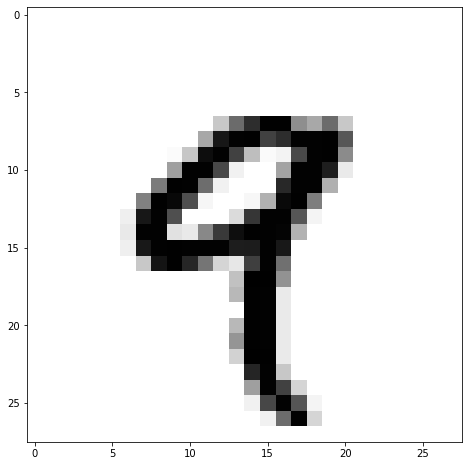

In [22]:
# as we did above, we can manipulate Numpy arrays using slicing.  For example, if we want
# to display the 4th image we can do the following
img_no = 4
print('img_no: %d  label: %d' % (img_no, train_labels[img_no]))

img = train_images[img_no]
plt.imshow(img, cmap=plt.cm.binary);

## 2.2.6 Manipulating Tensors in Numpy

In the previous notice I didn't specify the slice for all 3 dimensions.  It is assumed that if you don't
specify slices on a dimension, you want all values for that dimension.  Thus in previous example, we got
the $28 \times 28$ pixels for training image number 4.

If we want to select a batch of images, we can use the same idea/trick in Python.  For example, to get
images 10 through 100 (up to but not including image 100) we slice like this

In [23]:
my_slice = train_images[10:100]
print( my_slice.shape )

# equivalent to what we did before
my_slice = train_images[10:100, :, :]
print( my_slice.shape )


# also equivalent to being explicit for each dimension
my_slice = train_images[10:100, 0:28, 0:28]
print( my_slice.shape )


(90, 28, 28)
(90, 28, 28)
(90, 28, 28)


This type of array slicing in Python is very powerful.  Make sure you are comfortable with it and how to
use it and how it work.  For example, as shown in the book, if we want the pixels in the bottom right of
the images, we can do something like:

(14, 14)


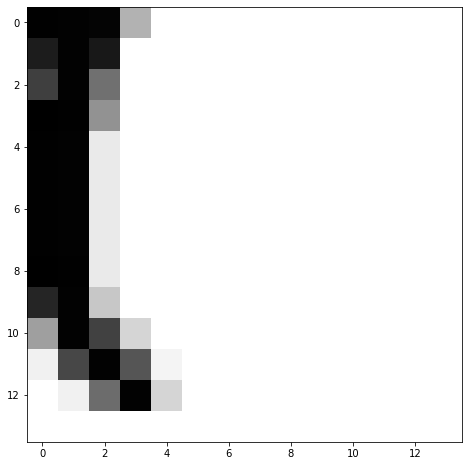

In [24]:
# different from text example, get only bottom right of image 4
img = train_images[4, 14:, 14:]
print( img.shape )
plt.imshow(img, cmap=plt.cm.binary);

(14, 14)


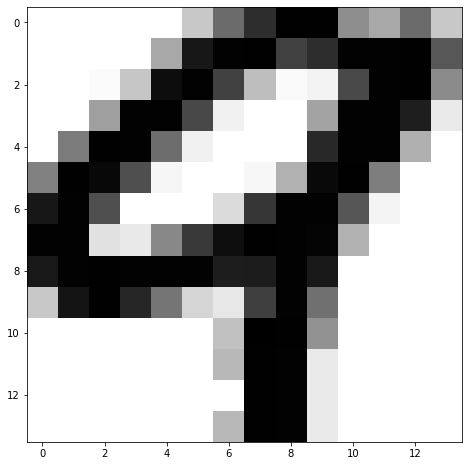

In [25]:
# same idea, but extract the middle 14x14 pixels of the image
img = train_images[4, 7:-7, 7:-7]
print( img.shape )
plt.imshow(img, cmap=plt.cm.binary);

## 2.2.7 The Notion of Data Batches

By convention, the first axis (axis 0) in all data tensors for machine learning will usally be the
*samples axis* (sometimes called the *samples dimension*).  When doing batch training, we might also
refer to this axis as the *batch dimension*.

For batch learning, we train a model or network in batches.  Thus, like we did above, if we want to
get a batch of the first 128 images we can do the following.  

In [26]:
batch = train_images[:128]
print( batch.shape )

(128, 28, 28)


Likewise we can get the next batch.  And we can get any arbitrary nth batch.

In [27]:
# 2nd batch
batch = train_images[128:256]
print( batch.shape )

# nth batch
n = 5
batch = train_images[128 * n : 128 * (n + 1)]
print( batch.shape )
print( 128 * n, 128 * (n + 1) )

(128, 28, 28)
(128, 28, 28)
640 768


## 2.2.8 Real-World Examples of Data Tensors

## 2.2.9 Vector Data

## 2.2.10 Timeseries Data or Sequence Data

## 2.2.11 Image Data

## 2.2.12 Video Data

# 2.3 The Gears of Neural Networks: Tensor Operations

All transformations learned by neural networks can be reduced to a handful of *tensor operations*.
For example, add tensors, multiply tensors, and so on.

The `Dense` or fully connected layer, for example, can be interpreted as a tensor operation that takes
a 2D tensor input and returns another 2D tensor output, use the following tensor operations:

```
output = relu(dot(W, input) + b)
```

There are 3 tensor operations here.  The `dot()` function is the dot product, or a 2D matrix multiplication
of `W` (the network weights) and the `input`.  Then there is an addition (+) between the result of the matrix multiplication
and a vector named `b` (the network biases).  Finally a `relu()` operation is done, here `relu(x)` is `max(x, 0)`.

## 2.3.1 Element-wise Operations

The `relu` operation and addition operation of the output above are examples of element-wise operations.  These are operations that are
applied independently to each enatry in the tensors being considered.  These operations are highly amenable to massively parallel implementations,
also known as *vectorized* implementations.  

The dot product above represents a matrix multiplication operation.  But matrix multiplication, and other matrix/tensor operations are also
highly amenable to parallel implementations.

We can write naive implementations of the element-wise operations just discussed.  Naive here means that we are not parallelizing
the computations.  But performing each element-wise operation 1 at a time (using loops to loop over the rank-2 2 dimensional
matrix input), we searialize the computations:

In [28]:
def naive_relu(x):
    # x is a rank-2 tensor
    assert len(x.shape) == 2
    
    # avoid overwriting the input tensor
    x = x.copy()
    
    # explicit loop to compute relus element by element
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    
    return x

In [29]:
def naive_add(x, y):
    # x and y are rank-2 tensors
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    # avoid overwriting the input tensor
    x = x.copy()
    
    # explicit loop to compute element wise addition
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
            
    return x


In [30]:
# example of using naive relu function on some random data
x = np.random.normal(0.0, 3.0, size=(5, 5))
print(x)

x = naive_relu(x)
print(x)

[[ 3.92846889  1.67009368  6.55769125 -1.18793268 -2.18207655]
 [-2.44689638 -0.18765781 -5.66778969 -1.66626921 -2.04443905]
 [ 3.57896909  3.23938252  2.67834181 -2.4515247   9.43051045]
 [ 1.00257531 -0.63778909  1.06569296  1.82903268  0.15185608]
 [-0.04179194 -3.89929094 -2.04688873 -1.34346111  0.64656674]]
[[3.92846889 1.67009368 6.55769125 0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [3.57896909 3.23938252 2.67834181 0.         9.43051045]
 [1.00257531 0.         1.06569296 1.82903268 0.15185608]
 [0.         0.         0.         0.         0.64656674]]


In [31]:
# example of using the naive add function on some random data
x = np.random.randint(-5, 5, (5,5))
y = np.random.randint(-5, 5, (5,5))
print(x)
print(y)

z = naive_add(x, y)
print(z)

[[-2 -1  1 -4 -1]
 [-1  4 -3 -1 -3]
 [-3  3 -5  0 -4]
 [ 2 -2 -1 -1 -3]
 [-4 -5 -4  2  4]]
[[ 1 -4  0  0  2]
 [-5 -5 -3  4 -2]
 [ 4  3 -3  4 -2]
 [-1 -5  1  3 -1]
 [-2  0 -4 -5 -3]]
[[-1 -5  1 -4  1]
 [-6 -1 -6  3 -5]
 [ 1  6 -8  4 -6]
 [ 1 -7  0  2 -4]
 [-6 -5 -8 -3  1]]


In practice, when dealing with tensors represented as NumPy arrays, these operations are available as 
well optimized built-in NumPy functions.  NumPy element-wise and matrix/tensor operations delegate the
heavy lifiting to highly optimized libraries, such as the Basic Linear Algebra Subprograms (BLAS) 
implementation.  BLAS are low-level highly-parallel, efficient tensor-manipulation routines
typically implemented in Fortran or C.

So instead of writing explict serial loops, we can perform element wise operations using vectorized
NumPy routines.  These will be much faster than naive serial implementations.

In [32]:
# generate random data again to demonstrate NumPy vectorized operations
x = np.random.normal(0.0, 3.0, size=(5,5))
y = np.random.normal(0.0, 3.0, size=(5,5))

print(x)
print(y)

[[-3.05244267 -0.70593158 -5.04392071 -2.38395551 -4.73366213]
 [ 6.04642474  1.04295347 -1.75340682 -0.45854914 -6.00510692]
 [-2.34142694  2.23246681  1.510994    0.54426055 -1.80842691]
 [-0.91695048 -1.59965842  2.9184323   0.14703775  1.77275743]
 [-1.5088829   4.49875078  0.22577297 -1.20308939  0.86602096]]
[[ 0.94169666  0.08841997  1.40934049 -0.07962323  2.76158171]
 [ 4.87473076 -0.99448507 -1.23471768  3.18793722 -2.86518952]
 [ 0.40337008 -0.90612703 -1.07442279 -2.79657678 -0.49663689]
 [-7.08444129 -0.20558906  3.14122492  2.13924084 -2.36023577]
 [ 0.52838539 -4.59725797 -1.00843347  0.39148294  2.45371032]]


In [33]:
# vectorized elementwise addition
z = x + y

# vectorized numpy function to find max which is relu function
z = np.maximum(z, 0.0)

print(z)

[[ 0.          0.          0.          0.          0.        ]
 [10.9211555   0.0484684   0.          2.72938808  0.        ]
 [ 0.          1.32633978  0.43657121  0.          0.        ]
 [ 0.          0.          6.05965722  2.28627858  0.        ]
 [ 0.          0.          0.          0.          3.31973127]]


Just to drive home the point about efficiency of implementation here, lets compare the time it takes to perform
the same operations using NumPy vectorized operations first:

In [34]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

In [35]:
t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.00 s


Here we are timing performing a vectorized addition and relu, where we perform these operations 1000 times.
The result will usually take only a tenth of a second or less (depending on the cpu of your system) using NumPy vectorized addition and
`maximum` functions.

Compare this to the time it takes to perform the same number of operations using the naive serialized
addition and relu implementations:

In [36]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.38 s


Typicaly this will take a whole 1.5 seconds or more to complete, which is a 2 orders of magnitude (> 100) difference in
time needed to perform the same operations.

## 2.3.2 Broadcasting

The previous example of the naive add was hard coded to support addition of rank-2 (2 dimensional) tensors with identical shapes.  But in the
`Dense` layer introduced earlier, we added a rank-2 tensor with a vector.  What happens with addition when the shapes of the two tensors being
added differ?

When possible, if there is no ambiguity, the small tensor will be *broadcast* to match the shape of the larger tensor.  Broadcasting
consists of two steps:

1. Axes (called *broadcast axes*) are added to the smaller tensor to match the `ndim` of the larger tensor.
2. The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

For example, consider `X` with shape `(32, 10)` (32 rows and 10 columns matrix) and `y` with shape `(10,)` (a vector of 10 values):

In [37]:
# X is a 2-d matrix of shape 32, 10.  the random function produces normal random numbers in the range from 0.0 to 1.0
X = np.random.random( (32, 10) )

# y is a random 1-d tensor, or in other words a vector, with shape (10,)
y = np.random.random( (10,) )

If we needed to perform broadcasting by hand, we might do the following.  First we expand the vector into 
a 2-d matrix with 1 row and 10 columns.

In [38]:
y = np.expand_dims(y, axis=0)
y.shape

(1, 10)

Then to match the shape of `X` we can *broadcast* or in other words repeat the values of `y` so that we match the element-wise shape of `X`:

In [39]:
Y = np.concatenate([y] * 32, axis=0)
Y.shape

(32, 10)

In [40]:
# if it is not clear, the following actually repeats the array 32 times
[y] * 32

# then the concatenate function combines them back into a single NumPy
# array, which now has shape (32, 10)

[array([[0.38498178, 0.96692239, 0.38789845, 0.36384709, 0.35124296,
         0.98562369, 0.8602685 , 0.24519633, 0.88297889, 0.09199815]]),
 array([[0.38498178, 0.96692239, 0.38789845, 0.36384709, 0.35124296,
         0.98562369, 0.8602685 , 0.24519633, 0.88297889, 0.09199815]]),
 array([[0.38498178, 0.96692239, 0.38789845, 0.36384709, 0.35124296,
         0.98562369, 0.8602685 , 0.24519633, 0.88297889, 0.09199815]]),
 array([[0.38498178, 0.96692239, 0.38789845, 0.36384709, 0.35124296,
         0.98562369, 0.8602685 , 0.24519633, 0.88297889, 0.09199815]]),
 array([[0.38498178, 0.96692239, 0.38789845, 0.36384709, 0.35124296,
         0.98562369, 0.8602685 , 0.24519633, 0.88297889, 0.09199815]]),
 array([[0.38498178, 0.96692239, 0.38789845, 0.36384709, 0.35124296,
         0.98562369, 0.8602685 , 0.24519633, 0.88297889, 0.09199815]]),
 array([[0.38498178, 0.96692239, 0.38789845, 0.36384709, 0.35124296,
         0.98562369, 0.8602685 , 0.24519633, 0.88297889, 0.09199815]]),
 array([[0.38

At this point since `X` and `Y` are the same shape, we can do element-wise operations, such as additon, multiplicaiton, etc.
between the two as before.

In actual implementation of broadcasting by NumPy, no new tensor is created as we did here, the repetition is done
entirely virtually at the algorithmic level to get maximum performance of the operations.

For example, again a naive serialized implementation of adding a matrix and a vector would look like the following.
Notice there are some constraints on the broadcasting.  The number of elements in the `y` vector has to match the number of columns
of the `X` matrix for the broadcasting to work here.

In [41]:
def naive_add_matrix_and_vector(X, y):
    '''Perform element-wise addition of a matrix and a vector using broadcasting.
    The X matrix is assumed to be a 2-dimensional matrix, and the y vector should have
    the same number of elements as the columns of X for the broadcasting to work.
    '''
    # X matrix is assumed to be a rank-2 2-d tensor
    assert len(X.shape) == 2
    
    # y vector is assumed to be a rank-1 vector
    assert len(y.shape) == 1
    
    # broadcasting is only defined if number of elements of vector y matches columns of X
    # matrix, so that we broadcast the vector onto each row of X
    assert X.shape[1] == y.shape[0]
    
    # assumptions are met at this point, so we can successfully broadcast the additon
    # make a copy of the X vector to avoid overwriting the input tensor
    X = X.copy()
    
    # perform naive element-wise addition, broadcasting the vector y onto the rows of X
    for row in range(X.shape[0]):
        for col in range(X.shape[1]):
            X[row, col] += y[col]
            
    return X

In [42]:
# an example of using our naive broadcasting addition on a vector of 10 values
X = np.random.random( (32, 10) )
y = np.random.random(10)

print(X)
print(y)

[[2.52927239e-01 5.72743481e-01 8.04984662e-01 5.33223913e-01
  6.25348037e-01 9.60646721e-01 1.93455454e-01 7.18716105e-01
  4.18986729e-01 3.68914007e-01]
 [9.84899605e-01 6.98738030e-01 8.92988797e-01 5.93450619e-01
  5.28756586e-02 8.69499976e-01 3.07076903e-01 8.11369344e-01
  8.04377375e-01 2.53662279e-01]
 [2.76137201e-03 6.91620256e-01 5.51112370e-01 4.04402303e-01
  6.31273264e-01 7.14498625e-01 6.90078659e-01 1.89810714e-01
  2.97721349e-01 3.78434147e-01]
 [6.86400240e-02 1.43552412e-01 5.38544091e-01 4.04600485e-01
  4.23561364e-01 7.42494864e-01 5.55085988e-01 5.36948138e-01
  9.64860182e-01 9.91624187e-01]
 [8.21130014e-01 9.20177751e-01 2.74251358e-02 6.08965827e-01
  6.37967479e-01 2.91927623e-01 1.32752726e-02 6.65730061e-01
  4.63021861e-01 6.53207290e-01]
 [2.61534736e-02 8.64248445e-01 9.18229135e-01 1.57594186e-01
  5.62177899e-01 4.09834603e-01 3.50237164e-01 9.76406372e-01
  3.78139046e-02 8.93694181e-01]
 [7.32821745e-01 4.65753004e-01 3.91352053e-01 5.43854897e

In [43]:
Z = naive_add_matrix_and_vector(X, y)
print(Z.shape)
print(Z)

(32, 10)
[[0.52729001 0.70365867 0.90502791 1.36366097 0.7334515  1.32249068
  0.39823892 1.1405672  0.65940913 1.0073064 ]
 [1.25926237 0.82965322 0.99303205 1.42388768 0.16097912 1.23134393
  0.51186037 1.23322044 1.04479977 0.89205467]
 [0.27712414 0.82253544 0.65115562 1.23483936 0.73937673 1.07634258
  0.89486212 0.61166181 0.53814375 1.01682654]
 [0.34300279 0.2744676  0.63858734 1.23503754 0.53166483 1.10433882
  0.75986945 0.95879923 1.20528258 1.63001658]
 [1.09549278 1.05109294 0.12746839 1.43940288 0.74607094 0.65377158
  0.21805874 1.08758115 0.70344426 1.29159968]
 [0.30051624 0.99516363 1.01827239 0.98803124 0.67028136 0.77167856
  0.55502063 1.39825746 0.2782363  1.53208657]
 [1.00718451 0.59666819 0.49139531 1.37429195 0.74329668 0.70089326
  0.65114614 1.13062195 0.32294643 0.92128196]
 [0.52833295 1.0833927  0.4586635  1.45187011 0.53146695 0.41811076
  0.46366193 0.87951211 0.95892038 1.61275406]
 [0.75371341 0.7592569  0.70738254 0.88095516 0.97975089 0.57030657
  0

Broadcasting will be done automatically by NumPy when using tensors whose shapes
can be broadcast successfully.

For example, adding a rank-4 tensor and a rank-2 tensor, the rank-2 tensor is broadcast appropriately to perform the
operation.

In [44]:
# x is a random rank-4 tensor with shape (64, 3, 32, 10)
x = np.random.random( (64, 3, 32, 10) )
print(x.shape)

# y is a rank-2 tensor of shape (32, 10)
y = np.random.random( (32, 10) )
print(y.shape)

# element-wise maximum function broadcasts y.  result is still shape (64, 3, 32, 10) like x.
# maximum is computed by broadcasting y
z = np.maximum(x, y)
print(z.shape)

(64, 3, 32, 10)
(32, 10)
(64, 3, 32, 10)


In [45]:
# note that dimensions do need to match.  e.g. cannot broadcast even like the following, though you might think
# it would make sense
x = np.random.random( (64, 3, 32, 10) )
y = np.random.random( (2, 10) )

try:
    z = np.maximum(x, y)
    print(z.shape)
except ValueError:
    print('ValueError occurs because operands can not be broadcast together with shapes (64, 3, 32, 10) and (2, 10)')

ValueError occurs because operands can not be broadcast together with shapes (64, 3, 32, 10) and (2, 10)


## 2.3.3 Tensor Product

The *tensor product* or *dot product* is one of the most common an dmost useful tensor operations.

The dot product is also known as the matrix multiplication operation.  This operation is defined over matrices.

In NumPy, you can use the `np.dot()` function to perform the tensor product.  For example, a vector multiplcation
can be done as:

In [46]:
# two vectors each with 32 elements
x = np.random.random( (32,) )
y = np.random.random( (32,) )

# dot product, results in scalar value, because result is computed as if 
# multiplying a 1x32 column matrix times a 32x1 row matrix giving a 1x1 or scalar result
# when performing tensor product of vectors this is known as the inner product
z = np.dot(x, y)
z

8.314652753722125

Since NumPy versions for Python 3, the `@` operator has been defined by NumPy to perform a dot product

In [47]:
# operator @ performs dot product on NumPy arrays
z = x @ y
z

8.314652753722125

A tensor product is a combination of multiplication and summation of groups of elements.  Conceptually for m rank-2 and higher tensor products you
can think of it as a weighted sum, as we will see later.

Mathematically for vectors, the dot product (called inner product when both tensors are vectors) is computed as follows:

In [48]:
def naive_vector_dot(x, y):
    # x and y are NumPy vectors
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    
    # x and y vectors have to have equal number of elements
    # for inner product to be defined
    assert x.shape[0] == y.shape[0]
    
    # result of inner product is a scalar.  The inner product is the sum of the element
    # wise multiplications
    z = 0.0
    
    for i in range(x.shape[0]):
        z += x[i] * y[i]
        
    return z

In [49]:
# demonstrate we get the same inner product result using our
# naive serialized implementation of the inner product
z = naive_vector_dot(x, y)
z

8.314652753722124

You can take the dot product between a matrix and a vector.  The number of elements of the vector `y` needs to match
the columns (or last dimension) of the matrix `X`.  The result of matrix `@` vector product is a vector where
the coefficients are the dot products between vector `y` and each row of `X`.

An implementation of matrix `@` vector multplication can be done by hand as follows:

In [50]:
def naive_matrix_vector_dot(X, y):
    '''Perform matrix @ vector product.  X is constrained to be a
    rank-2 2-d matrix, but it can be of higher rank for general matrix/vector
    multiplication.  Here y is a vector whose number of elements matches the
    number of columns of the 2-d matrix X.  The result is a new vector which is
    the inner product of y with each row of X
    '''
    # X is a rank-2 matrix
    assert len(X.shape) == 2
    
    # y is a vector
    assert len(y.shape) == 1
    
    # number of columns of X must be same as number of elemnts of the y vector
    assert X.shape[1] == y.shape[0]
    
    # perform the matrix @ vector multiplication.  Result is a vector with same
    # number of elements as rows of X (typo in textbook)
    z = np.zeros(X.shape[0])
    
    # perform the matrix vector product
    for row in range(X.shape[0]):
        for col in range(X.shape[1]):
            z[row] += X[row, col] * y[col]
            
    return z
            

In [51]:
# example of using our naive function
X = np.random.random( (5, 10) )
y = np.random.random( (10,) )

z = naive_matrix_vector_dot(X, y)
print(z.shape)
print(z)

(5,)
[2.41428853 2.51563796 2.33470674 2.38729443 1.81283436]


In [52]:
# demonstrate that our naive function is performing the same tensor product
z = X @ y
print(z.shape)
print(z)

(5,)
[2.41428853 2.51563796 2.33470674 2.38729443 1.81283436]


We could have reused our first function for performing the inner product of 2 vectors.  The following is eqivalent and emphasizes
that we are returning the inner product of y with each row of x.

In [53]:
def naive_matrix_vector_dot_2(X, y):
    z = np.zeros(X.shape[0])
    for row in range(X.shape[0]):
        z[row] = naive_vector_dot(X[row, :], y)
    return z

In [54]:
# demonstrate this second version is equivalent to previous and the NumPy tensor product
z = naive_matrix_vector_dot_2(X, y)
print(z.shape)
print(z)

(5,)
[2.41428853 2.51563796 2.33470674 2.38729443 1.81283436]


The dot product generalizes to tensors with an arbitray number of axes.
You can take the dot product of two rank-2 matrices `X` and `Y` if and only if
the shape of `X.shape[1] == Y.shape[0]`, or in other words if the number of columns
of `X` equals the number of rows of `Y`.  The result of the dot product is a
new rank-2 matrix of shape `(X.shape[0], Y.shape[1])`.

Or for example, if `X` is shape `(32, 10)` and `Y` is shape `(10, 22)` then
the dot product of these two matrices is defined since the number of columns of
`X` matches the number of rows in `Y`.  And the resulting size of the dot
product will be a new matrix of shape `(32, 22)`.

Here is a naive implementation of the tensor product operation for rank-2 matrices.
Each resulting element of the tensor product is a sum of the products of a row of 
`X` with a column of `Y`.

In [55]:
def naive_matrix_dot(X, Y):
    # X and Y are rank-2 NumPy matrices
    assert len(X.shape) == 2
    assert len(Y.shape) == 2
    
    # tensor product is defined if number of columns of X matches
    # number of rows of Y
    assert X.shape[1] == Y.shape[0]
    
    # result is the sum of the products of each row of X with each column of Y,
    # or in other words the inner product of rows of X with coluns of Y
    Z = np.zeros( (X.shape[0], Y.shape[1]) )
    
    # perform the tensor product, iterate over the rows of X
    # and over the columns of Y
    for row in range(X.shape[0]):
        for col in range(Y.shape[1]):
            # notice using NumPy slicing to slice out the row and column
            row_X = X[row, :]
            column_Y = Y[:, col]
            
            # reuse the inner product function from before, compute the scalar inner
            # product of the current row/column
            Z[row, col] = naive_vector_dot(row_X, column_Y)
            
    return Z
    

In [56]:
# example of tensor product using our naive implementation
# X is shape (3, 10) and Y is shape (10, 2)
X = np.random.random( (3, 10) )
Y = np.random.random( (10, 2) )

# result is a (3, 2) shaped matrix
Z = naive_matrix_dot(X, Y)
print(Z.shape)
print(Z)

(3, 2)
[[1.81174996 3.75803703]
 [2.30719842 3.63194   ]
 [1.07150342 2.41827698]]


In [57]:
# just to confirm, the NumPy tensor product should give the same result
Z = X @ Y
print(Z.shape)
print(Z)

(3, 2)
[[1.81174996 3.75803703]
 [2.30719842 3.63194   ]
 [1.07150342 2.41827698]]


More generally, you can take the dot product between higher-dimensional tensors.
For example, the resulting shape of tensor product between tensors of shapes is:

- `(a, b, c, d) @ (d,) -> (a, b, c)`
- `(a, b, c, d) @ (d, e) -> (a, b, c, e)`

In [58]:
# example multiplication of a rank-4 tensor and a vector
X = np.random.random( (5, 3, 8, 7) )
y = np.random.random( (7,) )
Z = X @ y
print(X.shape)
print(y.shape)
print(Z.shape)

(5, 3, 8, 7)
(7,)
(5, 3, 8)


In [59]:
# example multiplication of a rank-4 tensor and a rank-2 tensor
X = np.random.random( (5, 3, 8, 7) )
Y = np.random.random( (7, 5) )
Z = X @ Y
print(X.shape)
print(Y.shape)
print(Z.shape)

(5, 3, 8, 7)
(7, 5)
(5, 3, 8, 5)


## 2.3.4 Tensor Reshaping

It is often necessary to reshape tensors.  In general you can always reshape a tensor into a new tensor, with different or same ranks, as long
as the number of resulting elements remains the same in the reshaped tensor.

For example, we did this in the previous dense neural network example for the MNIST data.  The MNIST images contain 28 rows by 28 columns
of pixel inputs, but we feed in the inputs to the nerual networks as a flat `28 * 28 = 784` set of inputs.  So the input layer of the
neural network we trained expected 784 inputs.  So previously we needed to reshape the training images, as follows:

In [60]:
# refetch so we have the original unshaped data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# originally the training images is a set of 60000 samples, where each sample is a 28x28 matrix of image pixels.  Thus the input
# tensor is a rank-3 tensor of shape (60000, 28, 20)
print(train_images.shape)

(60000, 28, 28)


In [61]:
# but our simple Dense neural network expects a simple vector of inputs, so we have to flatten the 2-d
# image into a single dimension of size 784 in order to use these images as input for the network
train_images = train_images.reshape( (60000, 28 * 28) )
print(train_images.shape)

(60000, 784)


Reshaping simply rearranges the rows and columns to match the target shape.  Notice we reduced the tensor from a rank-3 to a rank-2
tensor in this example.  As long as the total number of elements remains the same, we can reshape a matrix to a new one of any rank
and number of elements per rank as desired.  For example, the number of elements in these tensors befor and after reshaping 
was `60000 * 28 * 28`

In [62]:
print(train_images.size)
print(60000 * 28 * 28)

47040000
47040000


Reshaping a tensor means rearranging its rows and columns to match a target shape.  Naturally the reshaped tensor has to have the same total
number of elements as the initial tensor as we discussed.  Some more examples of reshaping a tensor with 6 elements from our textbook:

In [63]:
# vector of elements from 0 to 6
x = np.arange(6)
print(x)
print(x.shape)

[0 1 2 3 4 5]
(6,)


In [64]:
# reshape to (3,2) rank-2 as shown initially in textbook
x = x.reshape( (3, 2) )
print(x)
print(x.shape)

[[0 1]
 [2 3]
 [4 5]]
(3, 2)


In [65]:
# turn into a column matrix, e.g. not a rank-1 vector, but a rank-2 matrix with 6 rows and 1 column
x = x.reshape( (6, 1) )
print(x)
print(x.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
(6, 1)


In [66]:
# turn into (2, 3) shaped matrix
x = x.reshape( (2, 3) )
print(x)
print(x.shape)

[[0 1 2]
 [3 4 5]]
(2, 3)


A special case of reshaping is *transposition* of the rows and columns.  This does change the order
of the elements.  Transposition means to exchange the rows and columns so that `x[i, :]` becomse
`x[:, i]`

In [67]:
# notice that this result is now (3, 2) shaped, and the order of elements is different from original (3, 2) shaped array from the
# transpose operation
x.transpose()

array([[0, 3],
       [1, 4],
       [2, 5]])

## 2.3.5 Geometric Interpretation of Tensor Operations

Tensor operations have a geometric interpretation that can be useful in some cases to get a better understanding of what function the
tensor operations is performing.

For example, consider addition of a vector.  Use a vector `A` with 2 elements, which can be interpreted as a point in

a 2 dimensional geometric space.

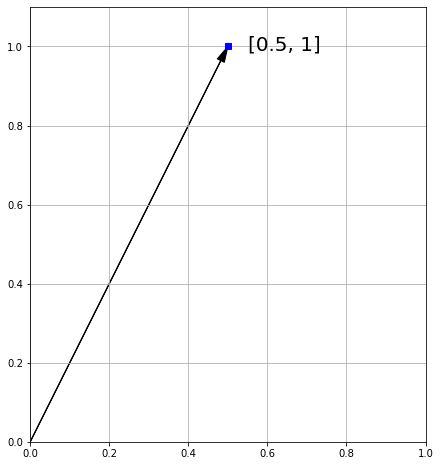

In [68]:
# the vector in 2D space
A = np.array([0.5, 1])

# set up figure properties
ax = plt.axes()
ax.set_aspect('equal')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1.1)

# visualize the vector as direction and magnitude from origin
plt.plot(A[0], A[1], 'bs')
plt.arrow(0, 0, A[0], A[1], head_width=0.02, head_length=0.04, length_includes_head=True, color='black')
plt.text(A[0] + 0.05, A[1] - 0.01, '[0.5, 1]', size=20)

plt.grid();


Now consider a new point `B = [1, 0.25]`.  Vector addition
can be conceptualized geometrically by
chaining together the vector arrows.  The result of vector
element-wise addition is a new vector of a particular direction
and magnitude.

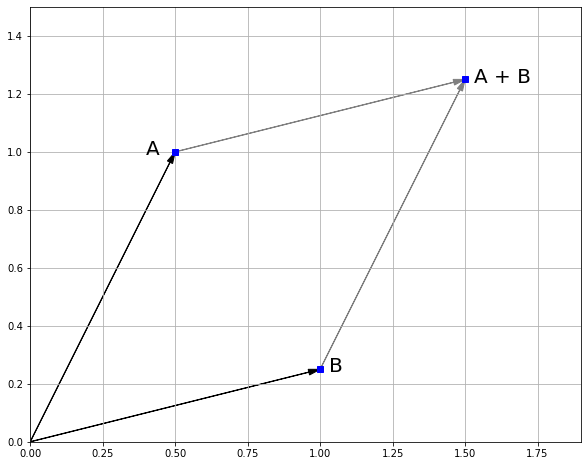

In [69]:
# the vector in 2D space
A = np.array([0.5, 1])
B = np.array([1.0, 0.25])

# set up figure properties
ax = plt.axes()
ax.set_aspect('equal')
ax.set_xlim(0, 1.9)
ax.set_ylim(0, 1.5)

# visualize the vector as direction and magnitude from origin
plt.plot(A[0], A[1], 'bs')
plt.arrow(0, 0, A[0], A[1], head_width=0.02, head_length=0.04, length_includes_head=True, color='black')
plt.text(A[0] - 0.1, A[1] - 0.01, 'A', size=20)

plt.plot(B[0], B[1], 'bs')
plt.arrow(0, 0, B[0], B[1], head_width=0.02, head_length=0.04, length_includes_head=True, color='black')
plt.text(B[0] + 0.03, B[1] - 0.01, 'B', size=20)

# add vectors, I will call it C
C = A + B
plt.plot(C[0], C[1], 'bs')
plt.arrow(A[0], A[1], B[0], B[1], head_width=0.02, head_length=0.04, length_includes_head=True, color='grey')
plt.arrow(B[0], B[1], A[0], A[1], head_width=0.02, head_length=0.04, length_includes_head=True, color='grey')
plt.text(C[0] + 0.03, C[1] - 0.01, 'A + B', size=20)


plt.grid();

Tensor addition thus represents the action of *translating an object* (moving the
object without distorting it) by a certain amount in a certain directory.

For example, if we want to translate a polygon shape, we can do the following.

[[0.  0.4 0.7 0.2 0. ]
 [0.  0.1 0.6 0.5 0. ]]
(2, 5)


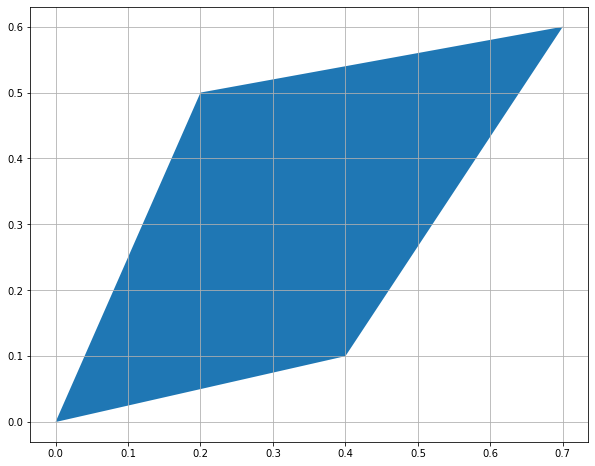

In [70]:
# a shape
x = np.array([0.0, 0.4, 0.7, 0.2, 0.0])
y = np.array([0.0, 0.1, 0.6, 0.5, 0.0])

# represent shape as a 2 row matrix, where each column is
# an x,y point of the shape to fill
s = np.array([x, y])
print(s)
print(s.shape)

# plot filled shape, row 0 are x positions and row 1
# are y positions
plt.fill(s[0], s[1]);
plt.grid();

[[0.2 0.6 0.9 0.4 0.2]
 [0.3 0.4 0.9 0.8 0.3]]
(2, 5)


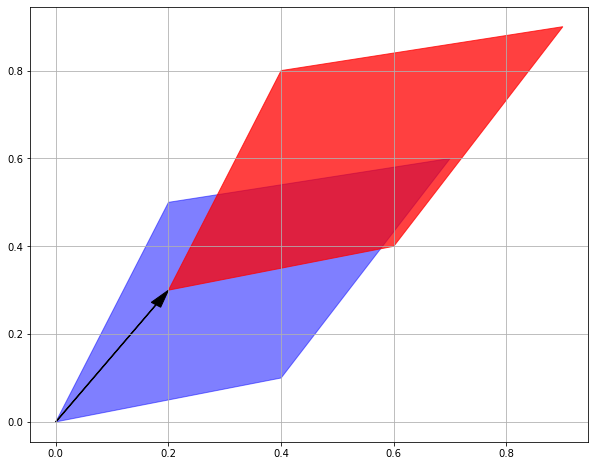

In [71]:
# perform object translation by adding horizontal and vertical factor to shape
# needs to be a (2,1) column matrix for the broadcasting to work here
translation_factors = np.array([0.2, 0.3]).reshape(2,1)

# notice we use broadcasting to add translation factors to shape coordinates
news = translation_factors + s
print(news)
print(news.shape)

# visualize the translation
# plot filled shape, row 0 are x positions and row 1
# are y positions
plt.fill(s[0], s[1], color='blue', alpha=0.5)
plt.fill(news[0], news[1], color='red', alpha=0.75)
plt.arrow(0, 0, translation_factors[0,0], translation_factors[1,0], head_width=0.02, head_length=0.04, length_includes_head=True, color='black')
plt.grid();

Rotation can be achieved by performing tensor product of matrix of `sin` and `cos` of desired rotation.

[[ 0.          0.33128347  0.41710561 -0.00656581  0.        ]
 [ 0.          0.24546133  0.82220612  0.53847645  0.        ]]
(2, 5)


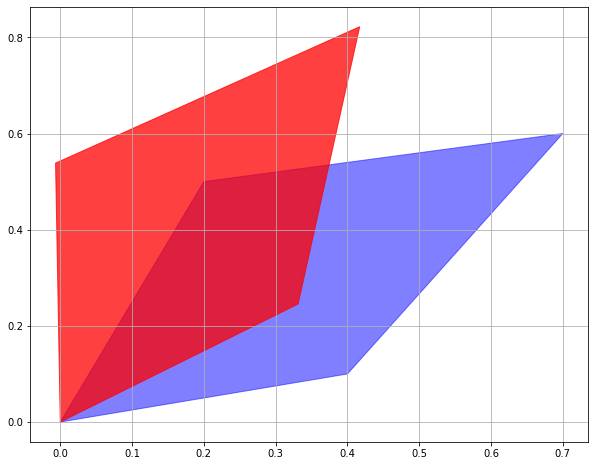

In [72]:
# rotate 22.5 degress or pi/8 radians
theta = np.pi / 8.0 
rotation_factors = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]])

# perform rotation
news = rotation_factors @ s
print(news)
print(news.shape)

# visualize the translation
# plot filled shape, row 0 are x positions and row 1
# are y positions
plt.fill(s[0], s[1], color='blue', alpha=0.5)
plt.fill(news[0], news[1], color='red', alpha=0.75)
plt.grid();

Scaling can be performed using a diagnol matrix defining the vertical and horizontal scaling factors.  
A negative scaling incidentally will cause a flip along the indicated axis.

So to make width 1.5 as big, and to make height 0.5 as big and flip along the
y axis, do:

(2, 2)
(2, 5)
[[ 0.    0.6   1.05  0.3   0.  ]
 [ 0.   -0.05 -0.3  -0.25  0.  ]]
(2, 5)


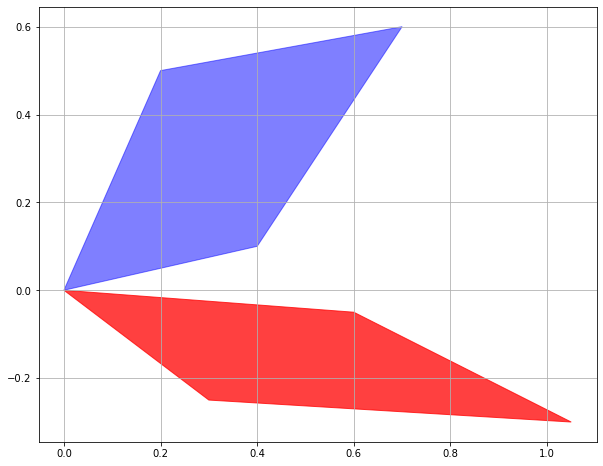

In [73]:
# scale width to be 1.5 times as big, but make 1/2 height and flip
# the y axis
scaling_factors = np.array([
    [1.5,  0.0],
    [0.0, -0.5]])

# perform rotation
print(scaling_factors.shape)
print(s.shape)
news = scaling_factors @ s
print(news)
print(news.shape)

# visualize the scaling operation
# plot filled shape, row 0 are x positions and row 1
# are y positions
plt.fill(s[0], s[1], color='blue', alpha=0.5)
plt.fill(news[0], news[1], color='red', alpha=0.75)
plt.grid();

*Scaling* and *rotation* are both linear transformations.  A dot product with an arbitray matrix implements
a linear transform.

**Affine transform** is a combination of a linear transform (using a dot product with some matrix, and
a translation (achieved by vector addition).  This is the basic calculation used to calculate
the output `y` of a layer from some input `x`, e.g. `y = W @ x + b`

As an example, define `W` as the same scaling operation as above, then translate 0.5 horizontally and
0.5 vertically.

(2, 2)
(2, 5)
[[ 0.5   1.1   1.55  0.8   0.5 ]
 [ 0.2   0.15 -0.1  -0.05  0.2 ]]
(2, 5)


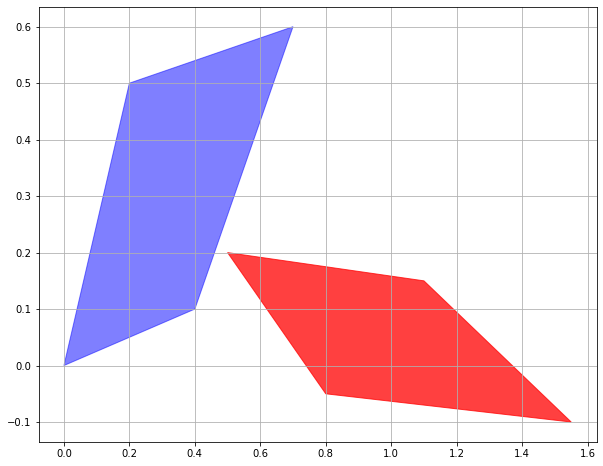

In [74]:
# Same scaling operation as before
W = np.array([
    [1.5,  0.0],
    [0.0, -0.5]])

# the bias here performs a translation, 0.5 vertical and 0.2 horizontal
b = np.array([0.5, 0.2]).reshape(2,1)

# perform rotation
print(W.shape)
print(s.shape)
news = (W @ s) + b
print(news)
print(news.shape)

# visualize the scaling operation
# plot filled shape, column 0 are x positions and column 1
# are y positions
plt.fill(s[0], s[1], color='blue', alpha=0.5)
plt.fill(news[0], news[1], color='red', alpha=0.75)
plt.grid();

Finally lets apply a `relu()` activation.  As discussed in the text, if all you apply are affine transforms
repeatedly, you still end up with an affine transform.  So you could calculate an expression that
applies all serial affine transformations as a single affine transformation.  

In practical terms, this means a dense neural network that only performs affine transformations (linear
transforms and translations) can be reduced to an equivalent single Dense layer.  In that case a
neural network would be equivalent to a linear model in disguise.

However, to allow for nonlinear transformations, neural networks usually apply a nonlinear
activation function to the affine transformation of each layer.  Thanks to the activation
function, a chain of Dense layers can be made to implement very complex non-linear
geometric transformations.  

It may not be obvious, but `relu()` applies a nonlinear activation function.

[[0.5  1.1  1.55 0.8  0.5 ]
 [0.2  0.15 0.   0.   0.2 ]]
(2, 5)


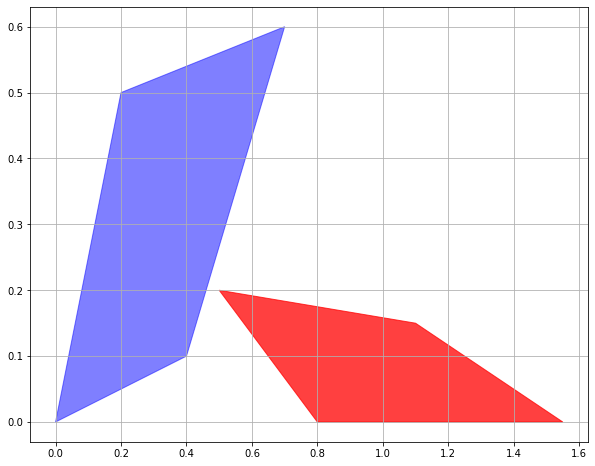

In [75]:
# Same scaling operation as before
W = np.array([
    [1.5,  0.0],
    [0.0, -0.5]])

# the bias here performs a translation, 0.5 vertical and 0.2 horizontal
b = np.array([0.5, 0.2]).reshape(2, 1)

# perform weighted summation and addition of bias, then apply
# a nonlinear relu.  Again the maximum of 0 essentially is the simple
# relu function
news = np.maximum((W @ s) + b, 0.0)
print(news)
print(news.shape)

# visualize the scaling operation
# plot filled shape, column 0 are x positions and column 1
# are y positions
plt.fill(s[0], s[1], color='blue', alpha=0.5)
plt.fill(news[0], news[1], color='red', alpha=0.75)
plt.grid();

## 2.3.6 Geometric Interpretation of Deep Learning

A neural network consists of a chain of tensor operations.  Translation, rotation and scaling are are linear transformations, which have
relatively simple geometric interpretations.  In addition neural network apply nonlinear activation functions, which add in ability
to model nonlinear functional relations between the input data and output label to be learned by the network.



# 2.4 The Engine of Neural Networks: Gradient-based Optimization

Each layer of a (dense / basic) neural network transforms the inputs to the layer into the layer outputs using the following expression / method:

\begin{equation}
\text{output} = \text{relu}(\text{dot}(\text{input}, W) + b)
\end{equation}

Here $W$ is a matrix of the layer weights (which summarize the linear transformations on the input values) and $b$ is a vector of bias terms (which as we saw
performs a type of translation).  Other activation functions than `relu()` can be used, for example a standard nonlinear sigmoid function, among others.  But
usually then after the weighted sum transformation of the inputs and addition of the bias, the results are put through a nonlinear output activation function
to get the final output result for the layer.

In this expression $W$ and $b$ are tensorts that are attributes of the layer.  They're called the *weights* or *trainable parameters* of the layer. These
trainable parameters are modified by some training algorithm (e.g. gradient descent optimization) in order to learn a good mapping that correctly
transforms inputs into outputs for the layer.

Initially these weight matrices are filled with small random values (*random initializaiton*).  There is no reason to expect that the function will yield
a correct result initially when $W$ and $b$ are random.  The resulting representations / transformations are meaningless.  Gradually these weights 
will be adjusted, based on a feedback signal, to produce better representations that transform the input to the desired output.  This gradual adjustment
is called *training*, and is the learning that machine learning is all about.

Training happens whith a *training loop* for some number of *epochs* of training.  The following is a high-level pseudocode of the steps in the training loop:

1. Draw a batch of training samples, $x$, and corresponding targets $y_true$.
2. Run the model on $x$ (a step called the *forward pass*) to obtain predictions, $y_pred$.
3. Compute the *loss* of the model on the batch (using a *loss function* or also called *fitness function*), a measure of the mismatch between $y_pred$
   and $y_true$
4. Update all weights of the model in a way that slightly reduces the loss on this batch.

And rinse and repeat until the loss is no longer being reduced sufficiently (called *convergence* of the training loop.

Step 1 is as simple as slicing an array of the input tensor to get a batch for training (or more usually, selecting a random sample to perform the batch).  Steps 
2 and 3 can be done with tensor operations of the same type as we have just been looking at.

Step 4 is the difficult part, how do we update a models weights so that it reduces the calculated loss on this batch of data, where the loss again is a measure of
how close the prediction outputs are to the true outputs we desire the model to produce.

**Gradient descent** is an iterative optimization technique that powers modern neural networks.  Here is the gist of it.  All of the linear transformations transform
the inputs in a smooth or continuous way.  Mathematically this means that these functions are *differentiable*.  If you chain together such functions the resulting
bigger function is still smooth and thus still differentiable.  In particular this also applies to the loss function that maps the coefficients (or weights)
of the model to the loss of the model on a batch of data: a small change in the model's coefficients results in a small, predictable change in the loss value.
This enables you to use a mathematical operator called the *gradient* to describe how the loss varies as you move the model's coefficients, and allows you to move
them in a direction that decreases loss.

## 2.4.1 What's a Derivative

The lecture notebook titled Calculus Review has some more details and review of the concept of derivatives and gradients.

In short, the *derivitive* of function $f$ at some point $f(x)$ is equivalent to the (instantenous) slope of the function at that point.
A positive derivative (or slope) means that a small increase in $x$ results in an increase of $f(x)$.  A negative derivative
means a small increase in $x$ results in a decrease of $f(x)$.  This is important because the sign of the derivative, if it is the
derivative of the loss function, tells you which direction you need to change the parameters $x$ in order to decrease the
loss function.  The absolute value of the derivitive (the *magnitude* of the derivative) tells you how quickly this increase
or decrease will happen.

Being able to determine the derivative of functions is a very powerful tool when it comes to *optimization*, the task of finding
values of $x$ that minimize the value of $f(x)$.  If the function you are optimizing is the loss function, by minimizing the loss
function $f(x)$ you will find the parameter (or weight) values that will give the best outputs for the function inputs (e.g. the ones that
will minimize the loss when transforming the inputs to the $y_pred$ outputs.

If you are trying to update $x$ by a factor $epsilon_x$ in order to minimize $f(x)$, and you know the derivative of $f$, then your job is done:
the derivative completely describes how $f(x)$ evolves as you change $x$.  If you want to reduce the value of $f(x)$, you just need to move
$x$ a little in the opposite direction from the derivative.

As a quick example, the derivative, or slope, of the function $x^2$ at $x = 2$ can be found in the limit as we compute the slope for
smaller and smaller values of $\Delta x$:

slope when x changes from 2 to 5:  7.0
slope when x changes from 2 to 4:  6.0
slope when x changes from 2 to 3:  5.0
slope when x changes from 2 to 2.5:  4.099999999999998
slope at x=2.000000 for deltax=1.0000000000000000 is:5.0000000000000000
slope at x=2.000000 for deltax=0.1000000000000000 is:4.1000000000000014
slope at x=2.000000 for deltax=0.0100000000000000 is:4.0099999999998914
slope at x=2.000000 for deltax=0.0010000000000000 is:4.0009999999996992
slope at x=2.000000 for deltax=0.0001000000000000 is:4.0001000000078335
slope at x=2.000000 for deltax=0.0000100000000000 is:4.0000100000270322
slope at x=2.000000 for deltax=0.0000010000000000 is:4.0000010006480116
slope at x=2.000000 for deltax=0.0000001000000000 is:4.0000000911533098


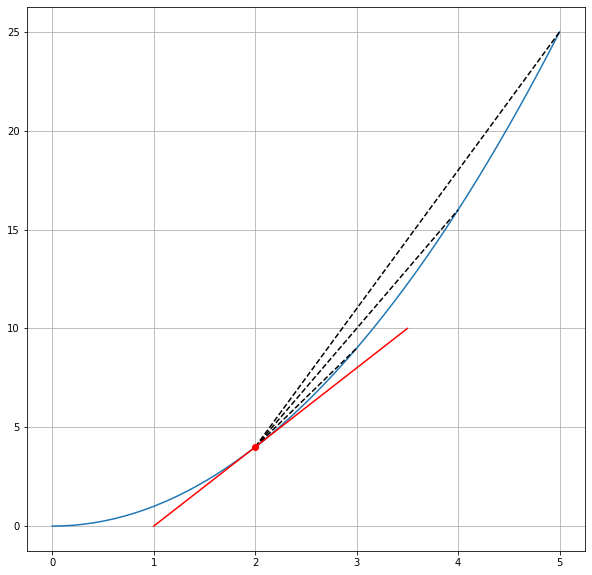

In [76]:
def f(x):
    return x**2

plt.figure(figsize=(10,10))
x = np.linspace(0, 5)
plt.plot(x, f(x));


# slope when x changes from 2 to 5 is
deltay = f(5.0) - f(2.0)
deltax = 5.0 - 2.0
m = deltay / deltax
print("slope when x changes from 2 to 5: ", m)
plt.plot([2.0, 5.0], [f(2.0), f(5.0)], 'k--')

# slope when x changes from 2 to 4 is
deltay = f(4.0) - f(2.0)
deltax = 4.0 - 2.0
m = deltay / deltax
print("slope when x changes from 2 to 4: ", m)
plt.plot([2.0, 4.0], [f(2.0), f(4.0)], 'k--')

# slope when x changes from 2 to 3 is
deltay = f(3.0) - f(2.0)
deltax = 3.0 - 2.0
m = deltay / deltax
print("slope when x changes from 2 to 3: ", m)
plt.plot([2.0, 3.0], [f(2.0), f(3.0)], 'k--')

# slope when x changes from 2 to 3 is
deltay = f(2.1) - f(2.0)
deltax = 2.1 - 2.0
m = deltay / deltax
print("slope when x changes from 2 to 2.5: ", m)
plt.plot([2.0, 2.1], [f(2.0), f(2.1)], 'k--')

# plot the tangent line, instantaneous slope is 4
# instantaneous slope (derivative) is 4, so line is y = 4x + b that goes through point (2,4), so y = 4x -4
# plot tangent at x=1.5 to x=3.5
x1 = 1.0
y1 = 4 * x1 - 4
x2 = 3.5
y2 = 4 * x2 - 4
plt.plot([x1, x2], [y1, y2], 'r-')
plt.plot(2, 4, 'ro');
plt.grid();

# example of slope as delta x decreases from 1 in powers of 10
x = 2
deltax = 10

for i in range(8):
    deltax = deltax / 10
    deltay = f(x + deltax) - f(x)
    m = deltay / deltax
    print("slope at x=%f for deltax=%0.16f is:%0.16f" % (x, deltax, m))

This is the fundamental idea behind the definition of the derivative, as the slope of the function in the limit when $\Delta x \rightarrow 0$.
\begin{equation}
m_{\text{tan}} = \lim\limits_{\Delta x \to 0} \frac{\Delta y}{\Delta x} = \lim\limits_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x} 
\end{equation}


## 2.4.2 Derivative of a Tensor Operation: The Gradient

The derivative of a tensor operation (or tensor function) is called a *gradient*.  Gradients are just the generalization of the
concept of derivatives to functions that take tensors as inputs.  

For a scalar function the derivative represents the *local slope* of the curve of the function.  In the same way, the gradient of
a tensor function represents the *curvature* of the multidimensional surfice described by the function.  It describes how the ouput of
the functions varies when its input parameters vary.

In machine learning (e.g. for a linear regression) consider:

- An input vector, $x$ (a sample in a dataset)
- A matrix, $W$ (the weights of a model, in our machine learning class we often refered to the weights as the theta or $\theta$ parameters of the model).
- A target, $y\_true$ (what the model should learn to associate to $x$).
- a loss function, `loss` (meant to measure the gap between the model's current predictions and $y_true$)

We can use $W$ (and $b$) to compute the target candidate $y\_pred$, and then compute the loss, or mismatch, between the 
target candidate $y\_pred$ and the target $y\_true$:

```
y_pred = W @ X + b
loss_value = loss(y_pred, y_true)
```

Given fixed inputs $x$ and $y\_true$ the preceeding can be interpreted as a function mapping values of $W$ to the loss values:

```
loss_value = f(W)
```



## 2.4.3 Stochastic Gradient Descent

## 2.4.4 Chaining Derivatives: The Backpropagation Algorithm

# 2.5 Looking Back at our First Example

The first example at start of chapter in section 2.1 used the keras high level api of tensorflow to 
specify a fully connected network with a dense layer followed by the output activation layer.

In this section to wrap things up, the author digs deeper into tensorflow and computation graphs, showing a bit
of a hand-built implementation of the high level operations here using lower more basic level tensorflow
concepts.

## 2.5.1 Reimplementing our First Example from Scratch

A simple Dense class.

In [77]:
import tensorflow as tf

class NaiveDense:
    """Simple example of how Dense layers in tf.keras can be implemented
    using tensorflow variables to create tensorflow compute graphs.
    
    This is a class that we can use to insttantiate a layer with some
    particular number of inputs and outputs, that maintains a weight
    matrix W and bias vector b in order to implement forward passes
    to calculate outputs given inputs, and to allow for calculation
    of gradients so that weights W and biases b can be updated by
    optimization to improve model performance iteratively.
    """
    
    def __init__(self, input_size, output_size, activation):
        """Class constructor, consruct initial weight matrix W and
        bias matrix b with small random values and 0 values respectively.
        """
        self.activation = activation
        
        # create a matrix W (model weights) of shape (input_size, output_size)
        # initilized with random values
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)
        
        # create a vector, b (bias vector) initialized with zeros
        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)
        
        
    def __call__(self, inputs):
        """Overload call operation on class to implement forward pass, calculating layer
        outputs given some inputs to the layer.
        """
        return self.activation(tf.matmul(inputs, self.W) + self.b)
    
    @property
    def weights(self):
        """Convenience method for retrieving the layer's weights
        """
        return [self.W, self.b]
    

A simple sequential class.

In [78]:
class NaiveSequential:
    """Exemple implementation of a Keras sequential model, which collects and composes a sequence of
    layers, like the NaiveDense layer, together into a multi-layer model. 
    """
    
    def __init__(self, layers):
        """Sequential model constructor, we are just given a list/tuple of layers which the model
        manages and uses.
        """
        self.layers = layers
        
    def __call__(self, inputs):
        """Overload call operation for Sequential model.  Basically perform a forward pass through
        all layers, transforming inputs to a layer to outputs, which are then feed as inputs to next
        layer in the sequential model, until final layer is reached.  Final outputs are
        returned from calling this sequential model.
        """
        x = inputs
        for layer in self.layers:
            # call forward pass on current layer using inputs from previous layer/loop
            x = layer(x)
            
        # return outputs calculated from final layer
        return x
    
    @property
    def weights(self):
        """Convenience method for gathering weights of all layers as a list
        """
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights


Using the `NaiveDense` class and the `NaiveSequential` class, we can create a mock Keras model

In [79]:
model = NaiveSequential([
    # hidden layer is shape (784 inputs, 512 hidden unit outputs), and uses relu activation function
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    
    # output layer is shape (512 inputs, 10 outputs) and uses a softmax activation function
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])

assert len(model.weights) == 4
model.weights

[<tf.Variable 'Variable:0' shape=(784, 512) dtype=float32, numpy=
 array([[0.05067137, 0.08194298, 0.00501376, ..., 0.02269856, 0.03827667,
         0.06679893],
        [0.00054151, 0.08804162, 0.04092173, ..., 0.05965308, 0.06929032,
         0.05181432],
        [0.05170382, 0.0346554 , 0.03341367, ..., 0.0519051 , 0.078918  ,
         0.0079264 ],
        ...,
        [0.04306405, 0.04381723, 0.07061508, ..., 0.01159017, 0.04215082,
         0.05966768],
        [0.02774729, 0.07488736, 0.05636181, ..., 0.03095688, 0.00252013,
         0.06423526],
        [0.06414353, 0.04021659, 0.02398804, ..., 0.03871474, 0.00332779,
         0.09072804]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(512,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0

Next we need a way to iterate over MNIST data in mini-batches.  In Python this is easy using slicing to slice up inputs into
batch-sized chunks.

In [80]:
import math

class BatchGenerator:
    """Convenience class that implements an iterator like interface to break up training inputs into
    batch-sized samples for batch training
    """
    
    def __init__(self, images, labels, batch_size=128):
        """Constructor is given full training data (images) and labels.  Defaults to
        batch sizes of 128 if not specified in construction of the generator.
        """
        # number of image samples and number of image labels must match
        assert len(images) == len(labels)
        
        # initial take first batch starting at index 0
        self.index = 0
        
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        
        # calculate number of batches to complete a full training cycle, we round up so last batch might
        # end up with fewer training samples that all of the preceding ones
        self.num_batches = math.ceil(len(images) / batch_size)
        
    def next(self):
        """Generator/iterator, calculate and return next batch of input samples and output
        labels for batch training.
        """
        # slice out the next batch of inputs and outputs
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        
        # update index for next batch iteration
        self.index += self.batch_size
        
        return images, labels

## 2.5.2 Running one Training Step

The most difficult part is the "training step".  We need to update the weights after the model runs.  We need to perform the following
steps to train a model:

1. Compute the predictions (output) of the model for the images in the batch
2. Compute the loss value for those predictions, given the actual labels.
3. Compute the gradient of the loss with regard to the model's weights.
4. Move the weights by a small amount (learning rate) in the direction opposite to the gradient.

To compute the gradient, we will use the TensorFlow `GradientTape` object.

In [81]:
def one_training_step(model, images_batch, labels_batch):
    """Function to perform a single training step on a single batch for
    our example NaiveModel.  We expect the current model, and
    a batch of images and labels as inputs.  The model performs
    the steps 1-4 described above.
    """
    with tf.GradientTape() as tape:
        # 1. forward pass, compute predictions of the model
        predictions = model(images_batch)

        # 2. compute loss, use crossentropy loss function, notice we get a loss for each batch
        # sample, and we then just average the losses over all samples to compute the
        # output layer loss
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
        #print(f"average loss {average_loss}")
        
        # 3. Compute the gradient of the loss with regard to the weights.  The output gradients is a list
        # where each entry corresponds to a weight from the model.weights list.
        gradients = tape.gradient(average_loss, model.weights)

        # 4. Update the weights using the gradient
        # this is actually a call to another function that applies the weight updates
        update_weights(gradients, model.weights)

        return average_loss

As you know, the purpose of the "weight update" step is to move the weights by "a bit" in a direction that will reduce
loss on this batch (e.g. batch gradient descent).  The magnitude of the weight movement is determined by a
`learning_rate` metaparameter, which is a parameter that is usually specified for the keras/optimizer.

The simplest way to implement this is to subtract `gradient * learning_rate` from each weight.

In [82]:
# might have to be modified to get training to converge, usually this would be another parameter specified for
# the model or optimizer
learning_rate = 0.0001

def update_weights(gradients, weights):
    """Perform weight update for gradient descent optimization using the calculated gradients of
    the current weights.
    """
    for g, w in zip(gradients, weights):
        # assign_sub is the equivalent of -= for TensorFlow variables.
        w.assign_sub(g * learning_rate)

In [83]:
# in practice you wouldn't want to update weights by hand, but use an optimizer from tf/keras library, e.g.
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights_alternative(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

Now that per-batch training step is ready, we can move on to implement an entire epoch of training.

## 2.5.3 The Full Training Loop

An epoch of training consists of repeating the training step for each batch in the training data.  This is what 1 epoch of training
is usually defined as.  We then will normally perform multiple epochs of training on the full batched training set until some stopping
critera is reached (convergence of the loss function when it no longer changes by some threshold), or more simply just for some fixed
number of epochs.

In [84]:
def fit(model, images, labels, epochs, batch_size=128):
    """Perform batch gradient descent.  Perform the indicated number of epochs of training. For each epoch, 
    train on all of the batches of the training data.
    """
    # perform the indicated number of epochs of training
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        
        # Create a batch generator/iterator for this epoch of training
        batch_generator = BatchGenerator(images, labels)
        
        # iterate over all batches of the training data to perform 1 epoch of training
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            # display batch progress by reporting loss
            if batch_counter % 100 == 0:
                print(f"   loss at batch {batch_counter}: {loss:.2f}")

Lets test drive it.

In [85]:
from tensorflow.keras.datasets import mnist

# reload the mnist data again
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [86]:
# fit the model with 10 epochs of batch training
fit(model, train_images, train_labels, epochs=50, batch_size=128)

Epoch 0
   loss at batch 0: 5.49
   loss at batch 100: 2.29
   loss at batch 200: 2.26
   loss at batch 300: 2.28
   loss at batch 400: 2.27
Epoch 1
   loss at batch 0: 2.27
   loss at batch 100: 2.25
   loss at batch 200: 2.22
   loss at batch 300: 2.24
   loss at batch 400: 2.22
Epoch 2
   loss at batch 0: 2.23
   loss at batch 100: 2.21
   loss at batch 200: 2.17
   loss at batch 300: 2.20
   loss at batch 400: 2.18
Epoch 3
   loss at batch 0: 2.18
   loss at batch 100: 2.17
   loss at batch 200: 2.13
   loss at batch 300: 2.16
   loss at batch 400: 2.15
Epoch 4
   loss at batch 0: 2.14
   loss at batch 100: 2.14
   loss at batch 200: 2.09
   loss at batch 300: 2.12
   loss at batch 400: 2.11
Epoch 5
   loss at batch 0: 2.10
   loss at batch 100: 2.10
   loss at batch 200: 2.05
   loss at batch 300: 2.08
   loss at batch 400: 2.07
Epoch 6
   loss at batch 0: 2.06
   loss at batch 100: 2.06
   loss at batch 200: 2.01
   loss at batch 300: 2.04
   loss at batch 400: 2.03
Epoch 7
   lo

## 2.5.4 Evaluating the Model

We can evaluate the model by taking the `argmax` of its predictions over the test images and comparing to the expected labels.

In [87]:
predictions = model(test_images)

# convert tensorflow tensor/variable to a numpy array
predictions = predictions.numpy()

predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


Currently getting an accuracy of 82% which is not great compared to the original keras example.  But loss is still going down so could/should
probably inbcrease learning rate and or continue training to reduce loss further.